# Análise exploratória da base Auto MPG

A atividade a realizar está no final, mas estude todo o *notebook*

In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Vamos fazer uma análise exploratória sobre um dataset sobre carros.

Fonte: [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [2]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [3]:
data = pd.read_csv("auto_mpg_sub.csv")

**Dicionário de dados:**


Variável | Descrição
:---:|---:
mpg | consumo em miles per gallon
cylinders | número de cilindros do motor do carro
displacement | deslocamento dos cilindros em polegadas cúbicas
horsepower | potência do veículo (HP)
weight | peso do veículo (libras)
acceleration | aceleração do veículo
model year | ano do modelo
origin | origem - veja abaixo
car name | nome do carro

A variável *origin* identifica o país de origem de um veículo

Valor | Origem
:---:|:---:
1 | Estados Unidos da América
2 | Europa
3 | Japão

In [4]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]

Verificando valores nulos.

In [7]:
np.sum(df.isnull())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

Separação das variáveis resposta e preditoras

In [8]:
Y = df['mpg']

In [9]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]

Uso da função `regress` (que está neste *notebook* )

In [10]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          3.79e-135
Time:                        11:16:08   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model year       0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O que estes valores $P > |t|$ dizem a respeito das variáveis preditoras usadas?


**R.:**

### Exemplo de regressão múltipla

Observe como plotar os resultados de uma regressão múltipla

In [11]:
X3 = df[['cylinders',
       'acceleration']]
results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     299.1
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           2.14e-79
Time:                        11:16:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     389   BIC:                             2375.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.5704      2.247     18.052      0.000      36.152      44.989
cylinders       -3.4624      0.169    -20.526      0.000      -3.794      -3.131
acceleration     0.1172      0.104      1.124      0.262      -0.088       0.322
==============================================================================
Omnibus:                       33.933   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.359
Skew:                           0.658   Prob(JB):                     2.33e-10
Kurtosis:                       3.992   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
c = results3.params["const"]
w = results3.params["cylinders"]
y = results3.params["acceleration"]

In [13]:
def f(cylinders, acc):
    return c+w*cylinders + y*acc

In [14]:
npoints = 100
cylinders = np.linspace(X3["cylinders"].min(), X3["cylinders"].max(), npoints)
acc = np.linspace(X3["acceleration"].min(), X3["acceleration"].max(), npoints)


In [15]:
cylinders_xx, acc_yy = np.meshgrid(cylinders, acc)

In [16]:
z = f(cylinders_xx, acc_yy)

<IPython.core.display.Javascript object>


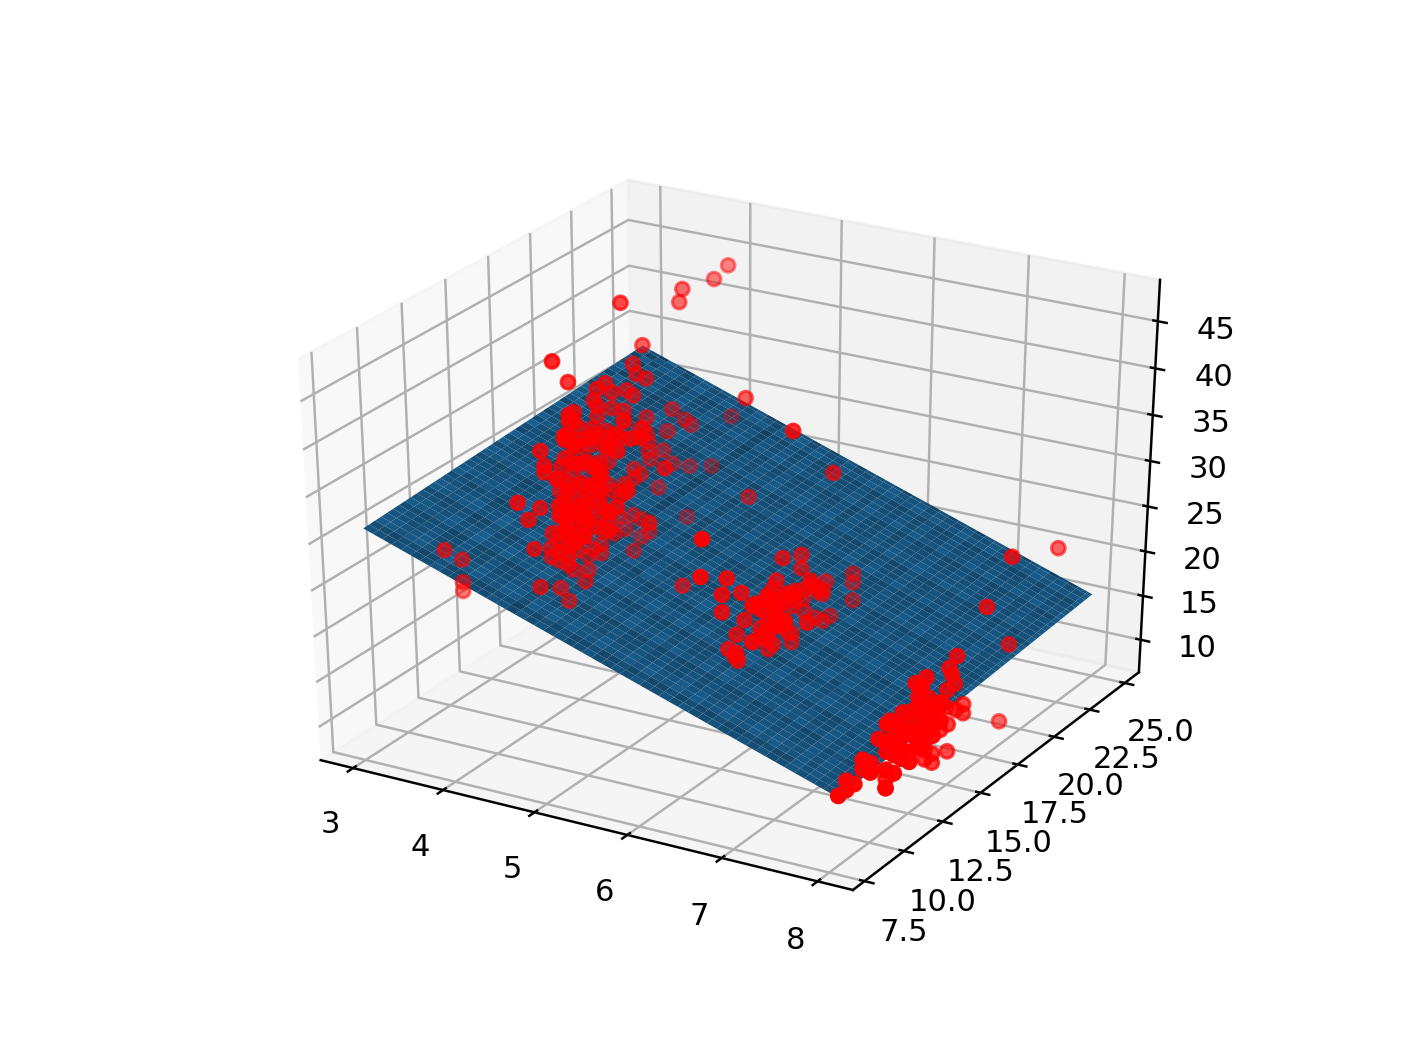

In [17]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(cylinders_xx, acc_yy, z)
plt3d.scatter(X3["cylinders"],X3["acceleration"], Y , color="r")

## Atividade

Parece que as variáveis `cylinders` e `acceleration` não são as melhores escolhas para explicar a economia de combustível.

Encontre $2$ variáveis melhores, gere o modelo via `OLS` e realize o plot 3D.